# IU Python Final_Phase 1: Tristen O'Brien, Elena Kirzhner, Sidd Pratap
Due Sunday Nov 18 @ 11:59pm EST

INSTRUCITONS & DELIVERABLES

No LATE submission allowed.

For submission your need TWO items:

1. Type a URL address for your team's github with you code, data, readme file with each member contribution explicitly stated. It is your responsibility that github content is accessible to instructors. Grade is based on group work and also on individual contribution.

2. Upload a notebook file (ipynb) separately


Grading criteria 30 pts

Data cleaning - report Number of NaN, replace ?, impute NaN by the column mean. 5 pts

Data Stats 5pts

Plotting Scatterplot and Bar Plot must have titles,y axis and x axis names, non-default colors. 9 histograms (subfigures) do not have to have titles. 5pts

Import libraries, Proper data import 5pts

Github set up with one folder for code and one folder for dataset 5pts [if you do not have folders, there will be no penalty. Having specific folders for code and data is a good practice].

Readme file with contributions 5pts

# Data & Library Import

In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')

In [2]:
df = pd.read_csv("Breast-Cancer-Wisconsin.csv") 
print(df.head())
print(df.tail())
df.columns.values

       Scn  A2  A3  A4  A5  A6  A7  A8  A9  A10  CLASS
0  1000025   5   1   1   1   2   1   3   1    1      2
1  1002945   5   4   4   5   7  10   3   2    1      2
2  1015425   3   1   1   1   2   2   3   1    1      2
3  1016277   6   8   8   1   3   4   3   7    1      2
4  1017023   4   1   1   3   2   1   3   1    1      2
        Scn  A2  A3  A4  A5  A6 A7  A8  A9  A10  CLASS
694  776715   3   1   1   1   3  2   1   1    1      2
695  841769   2   1   1   1   2  1   1   1    1      2
696  888820   5  10  10   3   7  3   8  10    2      4
697  897471   4   8   6   4   3  4  10   6    1      4
698  897471   4   8   8   5   4  5  10   4    1      4


array(['Scn', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'CLASS'], dtype=object)

# Data Cleaning

In [3]:
df["A7"] = df["A7"].replace('?', np.NaN) #Replace ? by NaN in column A7

In [4]:
df["A7"] = pd.to_numeric(df['A7']) #Apply pandas function pd.to_numeric() for column A7

In [5]:
print (df.isnull().sum())
print()
print ("There are", df['A7'].isnull().sum(), "NaN (null values) in column A7")#Report how many NaN

Scn       0
A2        0
A3        0
A4        0
A5        0
A6        0
A7       16
A8        0
A9        0
A10       0
CLASS     0
dtype: int64

There are 16 NaN (null values) in column A7


In [6]:
#Replace NaN values with the mean of column A7. 
#Use fillna() - find how to calculate mean of the column, add a parameter skipna=TRUE. 

df_clean = df.fillna(df.mean(skipna=True))

#Apply this function to the entire df - you do not need to specify here column A7

#CODE NOTES: df.fillna(df["A7"].mean(skipna=True)) if only replacing column A7
 
#CODE NOTES: use column 23 as a check, this originally han "?" that should be replaced by NaN, then by A7 Mean
# check A7 mean using df.describe(), below in Data Stats Section

# Data Stats

In [7]:
print (df_clean.describe()) #Provide the summary statistics

                Scn          A2          A3          A4          A5  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               A6          A7          A8          A9         A10       CLASS  
count  699.000000  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.544656    3.437768    2.866953    1.589413    2.689557  
std      2.214300    3.601852    2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.00000

In [8]:
print(df.shape) #Find number of columns and number of rows 
# hint use ___.shape[] - use a proper index for column and row (consult pandas).

(699, 11)


In [9]:
number_cols = len(df.columns)
number_rows = len(df.index)

In [10]:
print ("There are", number_rows, "rows and", number_cols, "columns") #Report how many observations (row) and columns

There are 699 rows and 11 columns


In [11]:
# OR
# Find number of columns and number of rows - hint use ___.shape[]
# TMTOWDYI
print(str(df.shape[0]) + " rows")
print(str(df.shape[1]) + " columns")

699 rows
11 columns


In [12]:
#Report how many unique id values (column Scn) 
unique_ids = len(df.Scn.unique()) 
print("there are", unique_ids, "unique ID values in the Scn Column")

there are 645 unique ID values in the Scn Column


# Plots: Histogram & Bar Plot

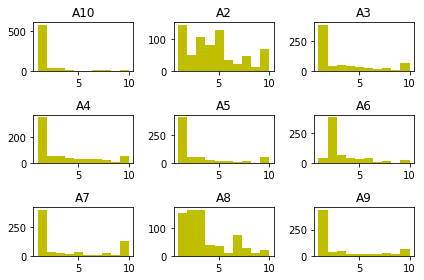

In [13]:
pd.DataFrame.hist(df.loc[:, 'A2':'A10'], grid = False, color = 'y') #Draw histograms for columns A2-A10
plt.tight_layout(rect=(0, 0, 1, 1))
plt.show()

In [14]:
df2 = pd.value_counts(df['CLASS'].values)

In [15]:
print (df2)

2    458
4    241
dtype: int64


In [16]:
benign = df2[2]
malignant = df2[4]

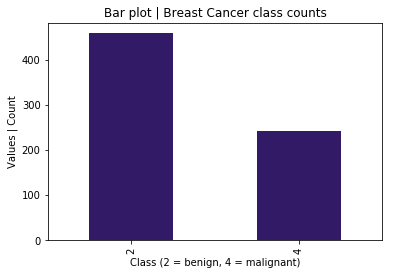

In [17]:
#Draw a bar plot for CLASS
df2[[2,4]] #getting errors using ['benign','malignant'] 
plt.title('Bar plot | Breast Cancer class counts')
plt.xlabel('Class (2 = benign, 4 = malignant)')
plt.ylabel('Values | Count')

df2.plot.bar(color = (0.2,0.1,0.4))
plt.show()

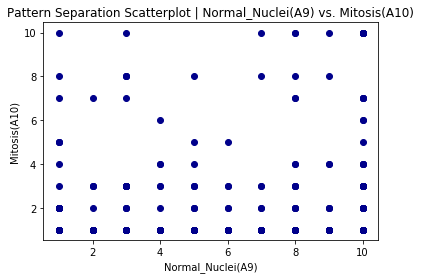

In [18]:
#Draw a scatterplot of any two columns
normal_nuclei = df['A9']
mitosis = df['A10']
plt.title('Pattern Separation Scatterplot | Normal_Nuclei(A9) vs. Mitosis(A10)')
plt.xlabel('Normal_Nuclei(A9)')
plt.ylabel('Mitosis(A10)')
plt.scatter(normal_nuclei, mitosis, c='DarkBlue')
plt.show()

In [19]:
#Summarize by reporting which values might need standardization in the future (too much variation) 
# and any other observations that you may discover as a Data Scientist.

# PHASE 1: SUMMARY

Using a Correlation matrix and visualizing with a heatmap (below), we observed that columns A3,A4 & A7 had correlation values of 0.817904, 0.818934 & 0.822696 (respectively) to the outcome variable CLASS (benign, malignant). 

These are the maximum correlations and highly signigifant, thus these would be the columns of high interst in future classifier models.

With respect to standardization, we observed the highest variance in A7, A8 & A4 (3.544656, 3.437768 & 3.207439 Standard Deviations, respectively). 

Looking at the individual histograms (below), we also conclude that A7 (Bare Nuclei) has the widest bifurcation in values. With many 1's and 10's at the extremes. Additionally, A10 (Mitosis) had many 1's and few other values, so the least variance (STDEV). 

Overall, we plan to persue a ranked normalization based on these findings, prioritizing and ranking columns. 
Columns A7 (Bare Nuclei) would be the prioritized column to standardize. Since all columns besice Scn (IDs) & CLASS (response variable) are on the same scale of grading (1-10), Standardization to the column average & setting STDEV to 1 seems to be a good first pass normalization strategy.


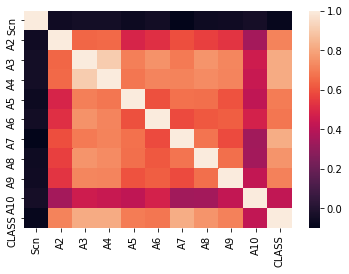

In [20]:
#create corelation matrix visualization to look for high co-variations with CLASS
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
# used https://stackoverflow.com/questions/39409866/correlation-heatmap as reference and code guide

In [21]:
print(corr[1:11]) # Omit colum 0 (Scn) as it is the ID and not a measurement variable.

            Scn        A2        A3        A4        A5        A6        A7  \
A2    -0.055308  1.000000  0.644913  0.654589  0.486356  0.521816  0.593091   
A3    -0.041603  0.644913  1.000000  0.906882  0.705582  0.751799  0.691709   
A4    -0.041576  0.654589  0.906882  1.000000  0.683079  0.719668  0.713878   
A5    -0.064878  0.486356  0.705582  0.683079  1.000000  0.599599  0.670648   
A6    -0.045528  0.521816  0.751799  0.719668  0.599599  1.000000  0.585716   
A7    -0.099248  0.593091  0.691709  0.713878  0.670648  0.585716  1.000000   
A8    -0.060051  0.558428  0.755721  0.735948  0.666715  0.616102  0.680615   
A9    -0.052072  0.535835  0.722865  0.719446  0.603352  0.628881  0.584280   
A10   -0.034901  0.350034  0.458693  0.438911  0.417633  0.479101  0.339210   
CLASS -0.080226  0.716001  0.817904  0.818934  0.696800  0.682785  0.822696   

             A8        A9       A10     CLASS  
A2     0.558428  0.535835  0.350034  0.716001  
A3     0.755721  0.722865  0.45869

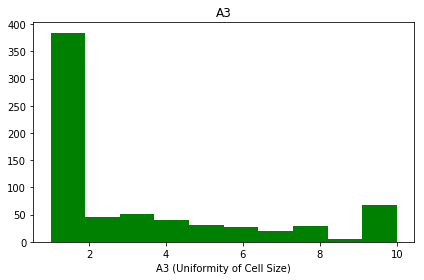

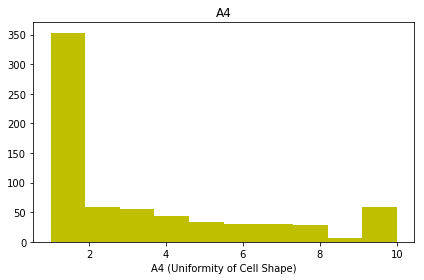

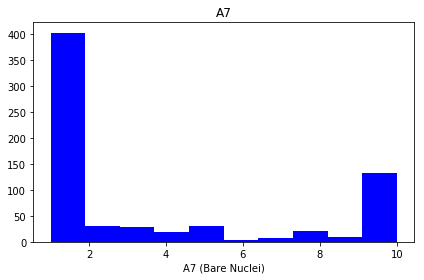

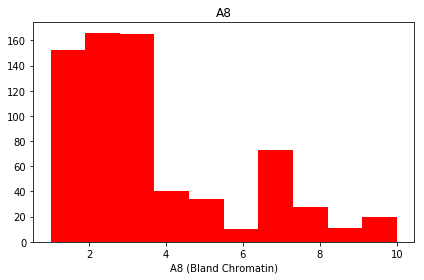

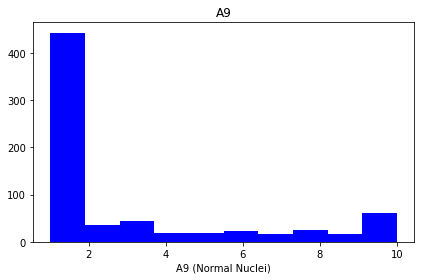

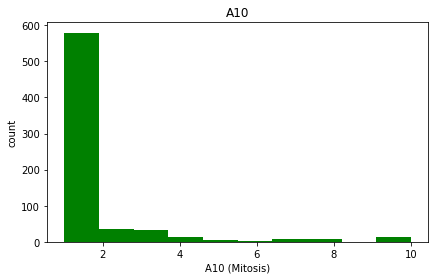

In [22]:
# individual histogram block for more detail and labeled axes

pd.DataFrame.hist(df[['A3']], grid = False, color = 'g')
plt.xlabel('A3 (Uniformity of Cell Size)')
plt.tight_layout(rect=(0, 0, 1, 1))

pd.DataFrame.hist(df[['A4']], grid = False, color = 'y')
plt.xlabel('A4 (Uniformity of Cell Shape)')
plt.tight_layout(rect=(0, 0, 1, 1))

pd.DataFrame.hist(df[['A7']], grid = False, color = 'b')
plt.xlabel('A7 (Bare Nuclei)')
plt.tight_layout(rect=(0, 0, 1, 1))

pd.DataFrame.hist(df[['A8']], grid = False, color = 'r')
plt.xlabel('A8 (Bland Chromatin)')
plt.tight_layout(rect=(0, 0, 1, 1))

pd.DataFrame.hist(df[['A9']], grid = False, color = 'b')
plt.xlabel('A9 (Normal Nuclei)')
plt.tight_layout(rect=(0, 0, 1, 1))

pd.DataFrame.hist(df[['A10']], grid = False, color = 'g')
plt.xlabel('A10 (Mitosis)')
plt.tight_layout(rect=(0, 0, 1, 1))

plt.ylabel('count')
plt.show()





# PHASE 2 Due Dec 2, 2018
In the second phase you will be implementing k-means algorithm
(do not use column CLASS) 10pts

continue working with cleaned breast cancer data from the phase 1 use only columns A2-A10

# Use KMeans algorithm 

1. import KMeans - use sklearn.cluster

2. create KMeans model for n_cluster = 4

3. fit model to your data

In [23]:
from sklearn.cluster import KMeans

df_noclass = df_clean.loc[:, 'A2':'A10'] 
# exclude Scn + CLASS column

model = KMeans(n_clusters = 4)
model.fit(df_noclass) 
labels_k4 = model.predict(df_noclass)

print('\n\n cluster counts:\n\n', pd.value_counts(labels_k4)) #how many of each class
print ('\n\n', labels_k4)
#code from DataCamp "unsupervised learning in python" as giude source

print('\n length of labels-object:',len(labels_k4)) 
#check for 699 values
#so all rows have a call and range from 0-3 (4 classes)



 cluster counts:

 0    454
1     94
2     80
3     71
dtype: int64


 [0 1 0 3 0 2 0 0 0 0 0 0 0 0 2 3 0 0 1 0 1 3 0 3 0 1 0 0 0 0 0 0 3 0 0 0 3
 0 1 1 3 3 2 3 3 0 1 0 0 3 3 0 3 2 1 3 3 3 1 3 3 0 3 3 0 3 0 1 2 0 0 3 0 1
 3 0 0 0 0 0 0 0 0 0 2 3 1 2 0 0 0 0 0 0 0 0 0 0 3 2 3 0 0 0 2 0 1 2 0 1 0
 1 1 2 0 0 0 2 0 0 0 0 2 1 2 0 1 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 2 0 1 3 0 0 1 0 0 0 2 1 0 0 0 0 0 2 3 0 0 0 0 0 2 1 2 0 3 0 1 0 0 0 2 1
 0 2 2 2 0 2 2 0 0 0 0 1 0 0 0 2 1 0 0 0 2 3 0 0 0 2 2 0 2 2 3 0 0 3 0 0 2
 0 1 1 0 1 3 0 2 1 2 3 1 0 0 2 3 2 1 0 0 0 0 0 0 2 1 0 0 0 1 1 2 3 1 0 0 0
 1 1 2 2 1 3 0 1 1 3 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 2 2 0 3 2 0 0 3 1 0 1
 3 0 0 1 3 0 2 0 1 1 0 0 3 0 0 0 3 0 0 3 1 2 0 1 1 0 0 1 0 0 1 0 3 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 0 2 0 0 0 3 1 0 0 3 2 0 0 0 2 3 1 2 1 0 0 0 0 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 3 0 1 0 1 0 0 0 0 2 0 0 0 2 0 3 0 0 0 0 0 0 1 1 3 0 0 0 1 0 0 0
 0 0 0 0 0 2 0 0 0 2 0 0 1 

# Calculate centroids 

print centroids - you should have a matrix with 4 row (4 clusters) and 9 columns (for each A column)


 size / shape of centroids-object (rows, columns): (4, 9)

 type of centroids-object: <class 'numpy.ndarray'>

 centroid min: 1.077092511013221

 centroid max: 9.382978723404246

 centroids-array:
 [[2.94493392 1.24449339 1.36563877 1.29295154 2.03964758 1.3514006
  2.06167401 1.20044053 1.07709251]
 [7.23404255 4.85106383 5.04255319 4.86170213 4.11702128 9.38297872
  5.26595745 3.78723404 1.64893617]
 [6.7625     8.3875     8.425      7.75       6.775      9.2125
  7.375      7.7375     3.7875    ]
 [7.46478873 7.02816901 6.67605634 4.1971831  5.53521127 3.45322005
  5.38028169 6.81690141 2.30985915]]


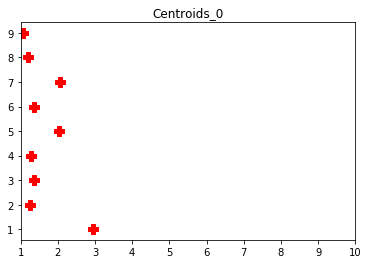

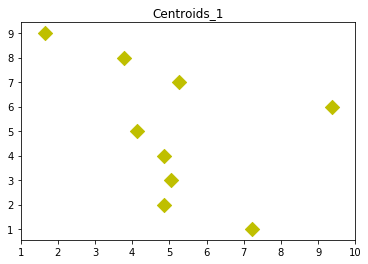

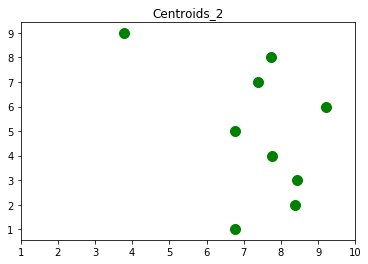

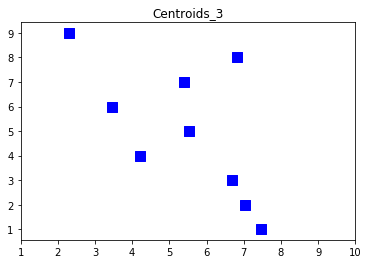

In [24]:
#
centroids = model.cluster_centers_
print("\n size / shape of centroids-object (rows, columns):", centroids.shape)
print("\n type of centroids-object:",type(centroids))
print("\n centroid min:", centroids.min())
print("\n centroid max:", centroids.max())
print('\n centroids-array:\n', centroids)

# data viz of centroids
centroids_0 = centroids[0,:]
centroids_1 = centroids[1,:]
centroids_2 = centroids[2,:]
centroids_3 = centroids[3,:]

x = list(range(1,10))

plt.scatter(centroids_0, x, marker = 'P', color = 'r', s=100)
plt.title("Centroids_0")
plt.xlim([1, 10])
plt.show()

plt.scatter(centroids_1, x, marker = 'D', color = 'y', s=100)
plt.title("Centroids_1")
plt.xlim([1, 10])
plt.show()

plt.scatter(centroids_2, x, marker = 'o', color = 'g', s=100)
plt.title("Centroids_2")
plt.xlim([1, 10])
plt.show()

plt.scatter(centroids_3, x, marker = 's', color = 'b', s=100)
plt.title("Centroids_3")
plt.xlim([1, 10])
plt.show()



# Find the optimal number of clusters 

1. calculate inertia: (10 pts)

2. create a range from 1 to 15 or more

3. create an empty list for inertias values

4. use for loop to calculate KMeans for each values

5. plot range and inertia

6. Add title, ylabel, xlabel

7. specify the optimal number of clustes based on the inertia plot

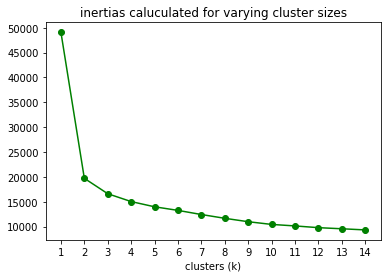

Optimun Custer Sze = 2 | Based on inflection point, "elbow")


In [25]:
#code from DataCamp "unsupervised learning in python" as giude source
#find max / min inertia

ks = range(1, 15)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(df_noclass)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-og')
plt.title('inertias caluculated for varying cluster sizes')
#plot.set(ylabel='Inertia')
plt.xlabel('clusters (k)')
#plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

print('Optimun Custer Sze = 2 | Based on inflection point, "elbow")')

# Revise data variation 10pts

1. apply standard deviation function for columns A2-A10

2. plot standard deviation values - select a graphic that could display all nine values [do not use histogram], add title, legend, ylabel, xlabel. 

Can you capture how wide or narrow is the variation in each column?
describe which features have a lot of data variation

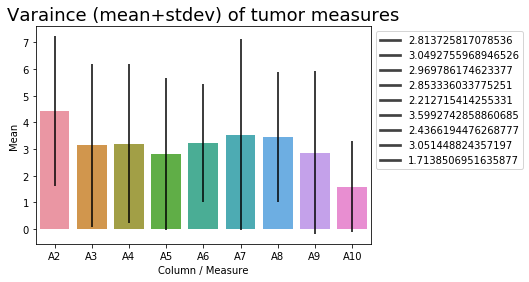

highest standard deviation (variation) is seen on A7, and A5,A7,A9 & A10 have STDEV > Mean


,A2,A3,A4,A5,A6,A7,A8,A9,A10
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [26]:
avg = np.mean(df_noclass) #print(avg)
dev = np.std(df_noclass) #print(dev)

plot = sns.barplot(x=x, y=avg, yerr=dev) # x is a list (1:9) from range(1,10)
#plt.bar(x, avg, yerr = dev)
plot.set(xlabel = 'Column / Measure', ylabel='Mean')
plt.title('Varaince (mean+stdev) of tumor measures', size = 18)
plt.xticks(np.arange(9), df_noclass.columns.values)
plt.legend(dev, bbox_to_anchor=(1,1), loc='upper left')
plt.show()

print('highest standard deviation (variation) is seen on A7, and A5,A7,A9 & A10 have STDEV > Mean')
df_noclass.describe() 
#note that np.std has slightly different (not significant) values than in describe() function (pandas)



# Implement normalization

import make_pipeline - use sklearn.pipeline 
import StandardScaler
review datacamp if needed on how to create a pipeline

use the n_cluster based on the optimal number you have identified from Inertia
find centroids and print them

Update your github code 2pts
Update your notebook
Update your readme file with contribution by each member for phase 2
Submit updated version of notebook and your link to github into Phase 2 assignment [one person submit on behalf of your group]

In [65]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# use Standard Scaler for pre-prosessing
scaler = StandardScaler()
kmeans = KMeans(n_clusters=2, n_init=20, max_iter=500)

pipeline_scaled = make_pipeline(scaler, kmeans) #create a pipeline
pipeline_scaled.fit(df_noclass) # Fit the pipeline to samples

# Calculate the cluster labels: labels
labels_scaled = pipeline_scaled.predict(df_noclass)
print('\n\n scaled_counts:\n', pd.value_counts(labels_scaled)) #how many of each class
print('\n\n labels_scaled:\n', labels_scaled)
#model_scaled = kmeans.fit(df_noclass)
#print('\n Scaled Centroids:\n',model_scaled.cluster_centers_) #find centroids and print them


#use Normalizer for pre-processing
normalizer = Normalizer()
kmeans = KMeans(n_clusters=2)

pipeline_normalized = make_pipeline(normalizer, kmeans)
pipeline_normalized.fit(df_noclass)

labels_normalized = pipeline_normalized.predict(df_noclass)
print('\n\n normalized_counts:\n', pd.value_counts(labels_normalized)) #how many of each class
print('\n\n labels_normalized:\n',labels_normalized)

#compare to non-normalized data with k=2
model_k2 = KMeans(n_clusters = 2)
model_k2.fit(df_noclass) 
labels_k2 = model_k2.predict(df_noclass)
print('\n\n labels_k2_counts:\n', pd.value_counts(labels_k2)) 
print('\n\n labels_k2:\n',labels_k2)

print('\n\n labels_k4_counts:\n', pd.value_counts(labels_k4))
print('\n\n labels_k4: \n', labels_k4)



 scaled_counts:
 0    465
1    234
dtype: int64


 labels_scaled:
 [0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 

In [28]:
print(type(pipeline_scaled)) 
print(pipeline_scaled)

print(type(pipeline_normalized)) 
print(pipeline_normalized)

<class 'sklearn.pipeline.Pipeline'>
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])
<class 'sklearn.pipeline.Pipeline'>
Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])


# Phase 3

# Cluster - 5pts

Note: continue working with the same data from Phase 1
    
Steps:

1. Change iteration to 500 and initial centroids to 20

The default values in KMeans are n_init=10 and max_iter=300. This means the initial centroids will be chosen 10 times, and each run will use up to 300 iterations. The best out of those 10 runs will be the final result. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html (Links to an external site.)Links to an external site.

2. Run Kmeans with n_clusters = 2

3. Save predicted clusters into a variable labels

In [66]:
model_20centroids = KMeans(n_clusters=2, n_init=20, max_iter=500)
model_20centroids.fit(df_noclass) 
labels_20centroids = model_20centroids.predict(df_noclass)

print(labels_20centroids)

[0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 1 0 0 1 0 

# DataFrame - 5pts

Steps:
1. Create a new column in your dataframe and add Kmeans labels.
2. Change labels values so that 0 becomes 2 and 1 becomes 4.
3. Print the first 15 records from your dataframe

In [67]:
#convert arrays to dataframes
df_labels_k2 = pd.DataFrame(labels_20centroids)

df_labels_k2_switched = df_labels_k2.replace({0:1, 1:0})
#need to switch originals as they are going to different cluster (1) than the scaled & normalized clusters
#switch all 0 to 1, and all 1 to 0

df_labels_scaled = pd.DataFrame(labels_scaled)
df_labels_normalized = pd.DataFrame(labels_normalized)

df_class = df_clean.loc[:,'CLASS'] #grab the CLASS column as the TRUE POSITIVE
df_class_switched = df_class.replace({2:0, 4:1})
# change CLASS column to agree 0 or 1, if wanting to do this as logical (0=healthy, 1=disease)
# replace 2 with 0 (benign) and replace 4 with 1 (malignant)

#concat dataframes on axis 1
df_merge = pd.concat([df_labels_k2, df_labels_scaled, df_labels_normalized, df_class_switched], axis = 1)
df_merge.columns = ['Raw_K2', 'Scaled', 'Norm', 'True_CLASS'] # name columns

# Change labels values so that 0 becomes 2 and 1 becomes 4.
df_merge_twofour = df_merge.replace({0:2, 1:4})

print('\n (rows , columns):', df_merge_twofour.shape) #should be 699 rows (patients) x 4 columns (classifiers)
print('\n', df_merge_twofour.head(15))
#print(df_merge_twofour)

# code sources: based on https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html


 (rows , columns): (699, 4)

     Raw_K2  Scaled  Norm  True_CLASS
0        2       2     2           2
1        4       4     4           2
2        2       2     2           2
3        4       4     4           2
4        2       2     2           2
5        4       4     4           4
6        2       2     4           2
7        2       2     4           2
8        2       2     4           2
9        2       2     2           2
10       2       2     4           2
11       2       2     4           2
12       2       2     4           4
13       2       2     4           2
14       4       4     4           4


In [68]:
df_merge_twofour['Raw_K2'].value_counts()
labels_class_k2 = df_merge_twofour.groupby('Raw_K2')['True_CLASS'].value_counts()
print('K2:',labels_class_k2)

df_merge_twofour['Scaled'].value_counts()
labels_class_Scaled = df_merge_twofour.groupby('Scaled')['True_CLASS'].value_counts()
print('\n Scaled:\n',labels_class_Scaled)

df_merge_twofour['Norm'].value_counts()
labels_class_Norm = df_merge_twofour.groupby('Norm')['True_CLASS'].value_counts()
print('\n Normalized:\n',labels_class_Norm)

df_merge_twofour['True_CLASS'].value_counts()
labels_class = df_merge_twofour.groupby('True_CLASS')['True_CLASS'].value_counts()
print('\n True_CLASS:\n',labels_class)

K2: Raw_K2  True_CLASS
2       2             447
        4              19
4       4             222
        2              11
Name: True_CLASS, dtype: int64

 Scaled:
 Scaled  True_CLASS
2       2             446
        4              19
4       4             222
        2              12
Name: True_CLASS, dtype: int64

 Normalized:
 Norm  True_CLASS
2     2             241
      4              33
4     2             217
      4             208
Name: True_CLASS, dtype: int64

 True_CLASS:
 True_CLASS  True_CLASS
2           2             458
4           4             241
Name: True_CLASS, dtype: int64


size / shape of centroids2-object (rows, columns):
 (14, 9)
type of centroids2-object:
 <class 'numpy.ndarray'>
centroids2 min:
 0.9999999999999998
centroids2 max:
 9.850000000000001
centroids2-array:
 [[3.95238095 4.38095238 5.04761905 3.14285714 4.61904762 9.23809524
  5.19047619 2.61904762 1.        ]
 [1.2459893  1.12299465 1.21390374 1.13903743 1.97326203 1.26881249
  1.98930481 1.06417112 1.10160428]
 [5.1875     7.1875     6.0625     7.4375     5.75       3.00558199
  6.         4.9375     1.3125    ]
 [7.55       9.25       9.3        8.05       7.6        9.85
  7.45       8.6        7.5       ]
 [4.064      1.24       1.396      1.348      2.024      1.27089312
  2.02       1.152      1.028     ]
 [8.19230769 8.73076923 7.92307692 4.11538462 5.30769231 3.09787138
  6.30769231 9.11538462 2.        ]
 [7.25       3.8        3.8        9.25       3.75       9.75
  5.5        4.05       2.1       ]
 [9.07692308 9.23076923 9.38461538 2.84615385 8.76923077 8.76923077
  6.15384615 3

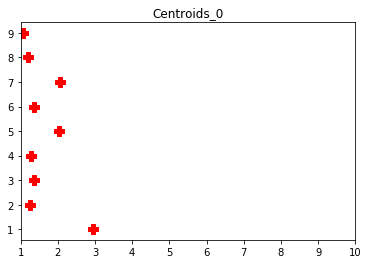

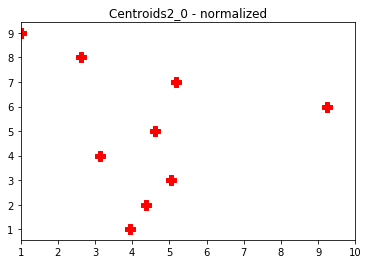

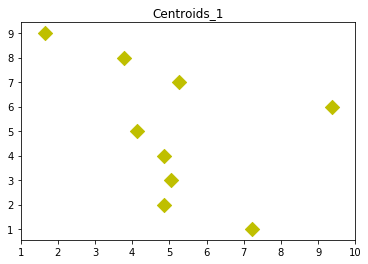

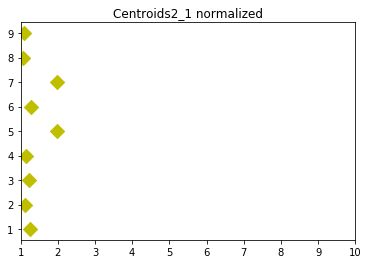

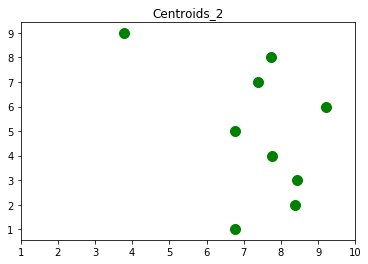

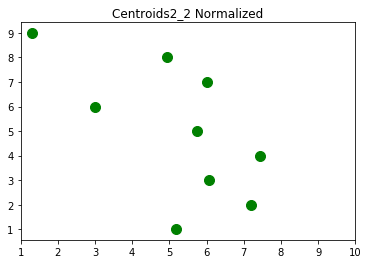

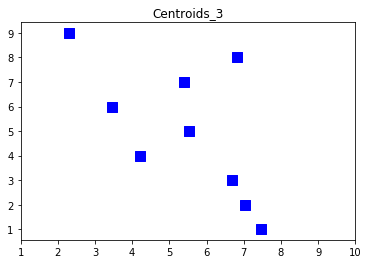

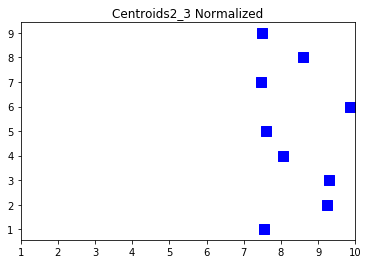

centroids:
 [[2.94493392 1.24449339 1.36563877 1.29295154 2.03964758 1.3514006
  2.06167401 1.20044053 1.07709251]
 [7.23404255 4.85106383 5.04255319 4.86170213 4.11702128 9.38297872
  5.26595745 3.78723404 1.64893617]
 [6.7625     8.3875     8.425      7.75       6.775      9.2125
  7.375      7.7375     3.7875    ]
 [7.46478873 7.02816901 6.67605634 4.1971831  5.53521127 3.45322005
  5.38028169 6.81690141 2.30985915]] 

 centroids_normalized:

 [[3.95238095 4.38095238 5.04761905 3.14285714 4.61904762 9.23809524
  5.19047619 2.61904762 1.        ]
 [1.2459893  1.12299465 1.21390374 1.13903743 1.97326203 1.26881249
  1.98930481 1.06417112 1.10160428]
 [5.1875     7.1875     6.0625     7.4375     5.75       3.00558199
  6.         4.9375     1.3125    ]
 [7.55       9.25       9.3        8.05       7.6        9.85
  7.45       8.6        7.5       ]
 [4.064      1.24       1.396      1.348      2.024      1.27089312
  2.02       1.152      1.028     ]
 [8.19230769 8.73076923 7.92307692 

In [32]:
centroids2 = model.cluster_centers_
print("size / shape of centroids2-object (rows, columns):\n", centroids2.shape)
print("type of centroids2-object:\n",type(centroids))
print("centroids2 min:\n", centroids2.min())
print("centroids2 max:\n", centroids2.max())
print('centroids2-array:\n', centroids2)

# data viz of centroids
centroids2_0 = centroids2[0,:]
centroids2_1 = centroids2[1,:]
centroids2_2 = centroids2[2,:]
centroids2_3 = centroids2[3,:]

x = list(range(1,10))

plt.scatter(centroids_0, x, marker = 'P', color = 'r', s=100)
plt.title("Centroids_0")
plt.xlim([1, 10])
plt.show()

plt.scatter(centroids2_0, x, marker = 'P', color = 'r', s=100)
plt.title("Centroids2_0 - normalized")
plt.xlim([1, 10])
plt.show()

plt.scatter(centroids_1, x, marker = 'D', color = 'y', s=100)
plt.title("Centroids_1")
plt.xlim([1, 10])
plt.show()

plt.scatter(centroids2_1, x, marker = 'D', color = 'y', s=100)
plt.title("Centroids2_1 normalized")
plt.xlim([1, 10])
plt.show()

plt.scatter(centroids_2, x, marker = 'o', color = 'g', s=100)
plt.title("Centroids_2")
plt.xlim([1, 10])
plt.show()
plt.scatter(centroids2_2, x, marker = 'o', color = 'g', s=100)
plt.title("Centroids2_2 Normalized")
plt.xlim([1, 10])
plt.show()

plt.scatter(centroids_3, x, marker = 's', color = 'b', s=100)
plt.title("Centroids_3")
plt.xlim([1, 10])
plt.show()
plt.scatter(centroids2_3, x, marker = 's', color = 'b', s=100)
plt.title("Centroids2_3 Normalized")
plt.xlim([1, 10])
plt.show()

print('centroids:\n', centroids, '\n\n centroids_normalized:\n\n',centroids2)

In [33]:
#code from DataCamp "unsupervised learning in python" as giude source

#labels = pipeline_scaled.predict(df_noclass)
#df = pd.DataFrame({'labels': labels, 'A7': df_noclass['A7']})

# Display df sorted by cluster label
#print('cluster counts:\n', pd.value_counts(labels)) #how many of each class
#print(df.sort_values('labels'))

# Error Rate Function - 15 pts
Note: 2 - benign cells; 4 - malign cells

1. Create a function

Your ErrorRate function will take TWO input arguments. First argument is cluster you obtained from your k-means algorithm (column labels), and second argument is the actual value (column CLASS) of cluster for a particular datapoint. The output from your function will be 1) error rate for benign cells, 2) error rate for malign cells, 3) total error rate.

Calculate error rate using the following formula for each clusters:

error for benign cells B =
total number of points with predicted labels = 4 that correspond to CLASS = 2 
/ 
total number of predicted labels = 2 benign error


error for malign cells M = 
total number of points with predicted labels = 2 that correspond to CLASS = 4 
/ 
total number of predicted labels = 4 malign


total error rate =
total number of datapoints with predicted labels (labels column) Not equal to actual class (CLASS column)
/
total number of datapoints

total

2. Pass your columns values into function and print out the error rate values. You can add a descriptive text to your output. For example: "error rate for benign: --, error rate for malign: --, total error rate: --"

In [132]:
def error_rate(predicted, true_class):
    """returns the error rates (False Positives & False Negatives) for 
    two clusters (label) arrays / dataframes. Takes two inputs, 1) TEST_PREDICTIONS and 2) TRUE_CALLS as arguements."""
 
    #initialize counters
    True_Neg_Count, True_Pos_Count, False_Neg_Count, False_Pos_Count = 0,0,0,0

    for call in range(0,699):
        if predicted[call] == 2: #print('Pred= B')
            if true_class[call] == 2: #print('True= B'), print('->>True_NEG \n')
                True_Neg_Count += 1
            elif true_class[call] ==4: #print(' *** False_NEG: (Pred=B / True=M)')
                False_Neg_Count += 1
        
        elif predicted[call] == 4: #print('Pred= M')
            if true_class[call] == 4: #print('True= M'), #print('->>True_POS \n')
                True_Pos_Count += 1
            elif true_class[call] == 2: #print('True= B'), #print(' *** False_Pos: Pred=M / True=B')
                False_Pos_Count += 1
                
    return(True_Neg_Count, True_Pos_Count, False_Neg_Count, False_Pos_Count)

In [260]:
Errors = error_rate(df_merge_twofour['Raw_K2'],df_merge_twofour['True_CLASS'])

TN = Errors[0]
TP = Errors[1]
FN = Errors[2]
FP = Errors[3]

predicted_B = (df_merge_twofour.Raw_K2.value_counts())
# hard coding 466 (benign) & 233 Malignent

benign_error = round((FP / 466)*100,2)
malignant_error = round((FN / 233)*100,2)
total_error = round((FP + FN / len(df_merge_twofour)),2) #len(df_merge_twofour)

print('ERROR RATES')
print('***********')
print('benign error rate =\n', benign_error, '%\n')
print('malignant error rate =\n', malignant_error, '%\n')
print('total error rate = \n', total_error, '%\n')

ERROR RATES
***********
benign error rate =
 2.36 %

malignant error rate =
 8.15 %

total error rate = 
 11.03 %



In [261]:
print('Base calculations [True|False] [Positives|Negatives] (TP, FP, TN, FN)')
print('*****************************************************')
print(TN, '| TN | True Negatives (Predicted & True = Benign)')
print(TP, '| TP | True Positives (Predicted & True = Malignant)')
print()
print(FN, '| FN | False Negatives (Predicted=Benign != True=Malignant)')
print(FP, '| FP | False Positives (Predicted=Malignant != True=Benign)')
print('\nValue counts of Predicted (2=Benign, 4=Malignant)')
print(predicted_B)
      
# Extra statistics for PPV, NPV, Sensitivity & Specificity
print('\n\nEXTRA STATS:\n\n')
print('Positive Predictive Value, Negative Predictive Value, Sensitivity & Specificity')
print('*******************************************************************************')
PPV = round((TP / (TP + FP)*100),2)
NPV = round((TN / (FN + TN))*100,2)
Sensitivity = round(TP / (TP + FN)*100,2)
Specificity = round(TN / (FP + TN)*100,2)


print("PPV | Positive Predictive Value (TP / (TP + FP)) = \n", PPV, '%\n')
print('NPV | Negative Predictive Value (TN / (FN + TN)) = \n', NPV, '%\n')
print('Sensitivity | (TP / (TP + FN) = \n', Sensitivity, '%\n')
print('Specificity | (TN / (FP + TN) = \n', Specificity, '%\n')

Base calculations [True|False] [Positives|Negatives] (TP, FP, TN, FN)
*****************************************************
447 | TN | True Negatives (Predicted & True = Benign)
222 | TP | True Positives (Predicted & True = Malignant)

19 | FN | False Negatives (Predicted=Benign != True=Malignant)
11 | FP | False Positives (Predicted=Malignant != True=Benign)

Value counts of Predicted (2=Benign, 4=Malignant)
2    466
4    233
Name: Raw_K2, dtype: int64


EXTRA STATS:


Positive Predictive Value, Negative Predictive Value, Sensitivity & Specificity
*******************************************************************************
PPV | Positive Predictive Value (TP / (TP + FP)) = 
 95.28 %

NPV | Negative Predictive Value (TN / (FN + TN)) = 
 95.92 %

Sensitivity | (TP / (TP + FN) = 
 92.12 %

Specificity | (TN / (FP + TN) = 
 97.6 %



In [207]:
print(predicted_B)
print(malignant_error)
print(benign_error)
print(total_error)
#len(df_merge_twofour)

2    466
4    233
Name: Raw_K2, dtype: int64
8.15
2.36
11.03


In [205]:
len(df_merge_twofour)

699